<h1 align=center> <font size =5> Proyecto de Invetarios </font></h1>
<img src="https://www.cedesistemas.edu.co/sitio/wp-content/themes/andreco/images/logo.png" width=300, align ="right"> 

* **Cedesistemas**
* **Gerencia Comercial**
* **Area Analítica**
* **Responsabes :** Oscar Gaspar, Analista;

**Medellin -Octubre 2020**

<a id="ref7"></a>
## Tabla de Contenido

* <p><a href ="#ref1" > 1) Descripcion del Problema </a></p>
* <p><a href ="#ref2" > 2) Descripcion de Datos </a></p>
* <p><a href ="#ref3" > 3) Análisis Exploratorio y Descriptivo de los Datos</a></p>
* <p><a href ="#ref4" > 4) Modelación </a></p>
* <p><a href ="#ref5" > 5) Evalucion </a></p>
* <p><a href ="#ref6" > 6) Conclusión y Recomendaciones </a></p>

<a id="ref1"></a>
## 1) **Descripcion del Problema**
* <p><a href ="#ref7"> <font color=red size=3> Inicio </font> </a></p>


**Contexto**

Se adjunta un conjunto de productos en el que estamos tratando de determinar qué productos debemos seguir vendiendo y qué productos eliminar de nuestro inventario. El archivo contiene TANTO datos históricos de ventas como inventario activo, que se pueden distinguir con la columna titulada "Tipo de archivo".

Sospechamos que la ciencia de datos aplicada al conjunto, como un análisis de árbol de decisión o una regresión logística, o algún otro modelo de aprendizaje automático, puede ayudarnos a generar un valor (es decir, puntaje de probabilidad) para cada producto, que se puede usar como principal determinante de la evaluación del inventario. Cada fila del archivo representa un producto.

Es importante notar que tenemos MUCHOS productos en nuestro inventario, y muy pocos de ellos tienden a venderse (solo alrededor del 10% se vende cada año) y muchos de los productos solo tienen una venta única en el transcurso de un año.

<a id="ref2"></a>
## 2) **Descripcion de Datos**
* <p><a href ="#ref7"> <font color=red size=3> Inicio </font> </a></p>


**Cargamos Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro # Vavariables Numericas probar Normalidad
from scipy.stats import chi2_contingency # Varianbles Categoricas y probar independencia

import statsmodels.stats.api as sms


In [2]:
#conda install statsmodels 

**Cargar Datos**

In [3]:
df = pd.read_csv(r"D:\Usuarios\OSCAGAAl\Documents\Diplomado_ML_2020\Insumos\SalesKaggle3.csv")

In [4]:
print(df.head(5))

   Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0      2  Historical     1737127       0.0        0.0             D   
1      3  Historical     3255963       0.0        0.0             D   
2      4  Historical      612701       0.0        0.0             D   
3      6  Historical      115883       1.0        1.0             D   
4      7  Historical      863939       1.0        1.0             D   

   ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0             15                 1        682743.0     44.99         2015   
1              7                 1       1016014.0     24.81         2005   
2              0                 0        340464.0     46.00         2013   
3              4                 1        334011.0    100.00         2006   
4              2                 1       1287938.0    121.95         2010   

   ItemCount  LowUserPrice  LowNetPrice  
0          8         28.97        31.84  
1         39          0.00

**Diccionario**

El archivo contiene datos históricos de ventas (identificados con la columna titulada File_Type) junto con el inventario activo actual que necesita evaluación (es decir, Tipo de archivo = "Activo"). Los datos históricos muestran las ventas de los últimos 6 meses. El objetivo binario (1 = venta, 0 = sin venta en los últimos seis meses) es probablemente el objetivo principal que debería impulsar el análisis.

Las otras columnas contienen atributos numéricos y categóricos que consideramos relevantes para las ventas.

Tenga en cuenta que algunos de los SKU de ventas históricos TAMBIÉN se incluyen en el inventario activo.

Algunos comentarios sobre los atributos incluidos, ya que nos damos cuenta de que podemos tener algunos atributos que son innecesarios o que es posible que deban explicarse.

* SKU_number: este es el identificador único para cada producto.

* Orden: solo un contador secuencial. Puede ignorarse.

* SoldFlag: 1 = vendido en los últimos 6 meses. 0 = No vendido

* MarketingType = Dos categorías de cómo comercializamos el producto. Esto probablemente debería ignorarse, o mejor aún, cada tipo debería considerarse de forma independiente.

* Bandera de nueva versión = cualquier producto que haya tenido una versión futura (es decir, número de versión> 1)

<a id="ref3"></a>
## 3) **Análisis Exploratorio y Descriptivo de los Datos**
* <p><a href ="#ref7"> <font color=red size=3> Inicio </font> </a></p>

**Revision de Nas**

In [5]:
df.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

**Tabla Cruzada**

In [6]:
df_hist=df[df["File_Type"]=="Historical"] # Historia para entrenar el modelo 
df_hist.isnull().sum()

Order               0
File_Type           0
SKU_number          0
SoldFlag            0
SoldCount           0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
dtype: int64

In [7]:
df_act=df[df["File_Type"]=="Active"] # Estaba es para Aplicar el Modelo
df_act.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

**Dimmension Base**

In [8]:
df_hist.shape

(75996, 14)

**Revision de Variables**

In [9]:
print(df_hist.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order             75996 non-null  int64  
 1   File_Type         75996 non-null  object 
 2   SKU_number        75996 non-null  int64  
 3   SoldFlag          75996 non-null  float64
 4   SoldCount         75996 non-null  float64
 5   MarketingType     75996 non-null  object 
 6   ReleaseNumber     75996 non-null  int64  
 7   New_Release_Flag  75996 non-null  int64  
 8   StrengthFactor    75996 non-null  float64
 9   PriceReg          75996 non-null  float64
 10  ReleaseYear       75996 non-null  int64  
 11  ItemCount         75996 non-null  int64  
 12  LowUserPrice      75996 non-null  float64
 13  LowNetPrice       75996 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 8.7+ MB
None


In [10]:
df_hist.head(2)
## Se Recomienda que las ID sean String

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54


**Recodificar Variables**

In [11]:
df_hist["Order"]=df_hist["Order"].astype(str) # Tranformar de Numerica a String
df_hist["SKU_number"]=df_hist["SKU_number"].astype(str) # Tranformar de Numerica a String

D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Recodicar en dos pasos Soldflag**

In [12]:
df_hist["SoldFlag"]=df_hist["SoldFlag"].astype(int) # Tranformar de decimal a entero
df_hist["SoldFlag"]=df_hist["SoldFlag"].astype('category') # Tranformar de decimal a entero

df_hist["MarketingType"]=df_hist["MarketingType"].astype('category') 

print(df_hist.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Order             75996 non-null  object  
 1   File_Type         75996 non-null  object  
 2   SKU_number        75996 non-null  object  
 3   SoldFlag          75996 non-null  category
 4   SoldCount         75996 non-null  float64 
 5   MarketingType     75996 non-null  category
 6   ReleaseNumber     75996 non-null  int64   
 7   New_Release_Flag  75996 non-null  int64   
 8   StrengthFactor    75996 non-null  float64 
 9   PriceReg          75996 non-null  float64 
 10  ReleaseYear       75996 non-null  int64   
 11  ItemCount         75996 non-null  int64   
 12  LowUserPrice      75996 non-null  float64 
 13  LowNetPrice       75996 non-null  float64 
dtypes: category(2), float64(5), int64(4), object(3)
memory usage: 7.7+ MB
None


D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

**Analisis de Variables categoricas**

In [13]:
pd.value_counts(df_hist["SoldFlag"])

0    63000
1    12996
Name: SoldFlag, dtype: int64

In [14]:
pd.value_counts(df_hist["SoldFlag"])/len(df_hist.index)

0    0.828991
1    0.171009
Name: SoldFlag, dtype: float64

In [15]:
(pd.value_counts(df_hist["SoldFlag"])/len(df_hist.index))*100

0    82.8991
1    17.1009
Name: SoldFlag, dtype: float64

**Grafico de Tortas variable Tipo de Venta**

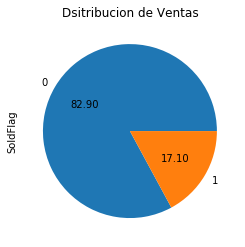

In [16]:
plot = df_hist["SoldFlag"].value_counts().plot(kind="pie",autopct="%.2f",title="Dsitribucion de Ventas")

**Graica por Tipo de Mercadeo**

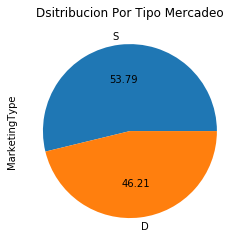

In [17]:
plot = df_hist["MarketingType"].value_counts().plot(kind="pie",autopct="%.2f",title="Dsitribucion Por Tipo Mercadeo")

**Tablas Cruzadas**

In [18]:
pd.crosstab(df_hist["SoldFlag"],df_hist["MarketingType"])

MarketingType,D,S
SoldFlag,,
0,25965,37035
1,9154,3842


In [19]:
# con total
pd.crosstab(df_hist["SoldFlag"],df_hist["MarketingType"],margins=True)

MarketingType,D,S,All
SoldFlag,,,
0,25965,37035,63000
1,9154,3842,12996
All,35119,40877,75996


In [20]:
## Terminos Porcentajes
pd.crosstab(index=df_hist["SoldFlag"],columns=df_hist["MarketingType"],margins=True).apply(lambda r:r/len(df_hist)*100,axis=1)


MarketingType,D,S,All
SoldFlag,,,
0,34.166272,48.732828,82.8991
1,12.045371,5.055529,17.1009
All,46.211643,53.788357,100.0000


**Prueba de Hipotesis para Variables categoricas- Test Estadisco de Independencia**

* H0= Las Variables MarketingType y SoldFlag son Independientes
* Ha= Las Variables MarketingType y SoldFlag son Dependientes

* Si P valor Estadistico de la Prueba <= 0.05; Rechazo H0 las variables son Dependientes
* Si P valor Estadistico de la Prueba > 0.05; Rechazo Ha; las variables son independientes



**Test chi 2**

In [21]:
tc=pd.crosstab(index=df_hist["SoldFlag"],columns=df_hist["MarketingType"])

In [22]:
c,p,pchi, test=chi2_contingency(tc)
p

0.0

In [23]:
if(p <= 0.05):
    print("Rechazo H0 las variables son Dependientes")
else:
    print("Rechazo Ha; las variables son independientes")

Rechazo H0 las variables son Dependientes


La variable tipo de mercadeo influye o esta relacionada con el tipo de venta del producto en los ultimos 6 meses

**Analisis De Variables Numericas**

In [24]:
df_hist.head(3)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97


In [25]:
df_hist["ReleaseNumber"]

0        15
1         7
2         0
3         4
4         2
         ..
75991     2
75992     6
75993     7
75994     2
75995     2
Name: ReleaseNumber, Length: 75996, dtype: int64

**Histograma de Numero de Lanzamientos del Producto**

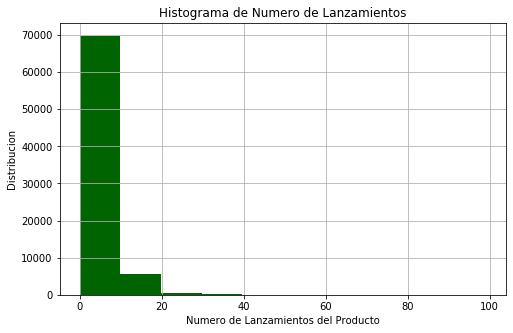

In [26]:
plt.figure(figsize=(8,5))
plt.hist(df_hist["ReleaseNumber"],facecolor="darkgreen")
plt.xlabel("Numero de Lanzamientos del Producto")
plt.ylabel("Distribucion")
plt.title("Histograma de Numero de Lanzamientos")
plt.grid(True)

**Promedio**

In [27]:
Promedio_Inicial=df_hist["ReleaseNumber"].mean()
print(Promedio_Inicial)

4.152534343912838


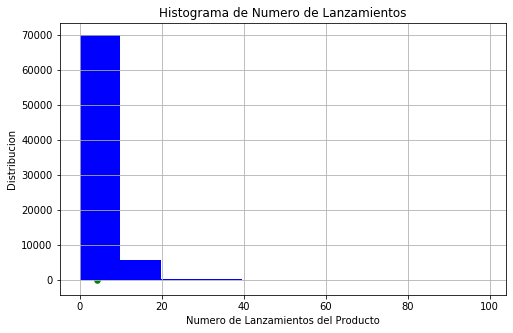

In [28]:
plt.figure(figsize=(8,5))
plt.hist(df_hist["ReleaseNumber"],facecolor="blue")
plt.scatter(Promedio_Inicial,0,color="green",s=30)
plt.xlabel("Numero de Lanzamientos del Producto")
plt.ylabel("Distribucion")
plt.title("Histograma de Numero de Lanzamientos")
plt.grid(True)

**Identificar Valores Atipicos**

**Boxplot**

Para dibujar el diagrama de caja necesitas conocer los valores de posición, llamados cuartiles 1 ,2 y 3. La longitud de la caja es el rango intercuartílico (q3-q1). Y la longitud de los «palos» (las líneas que salen de la caja) son los valores extremos. También necesitas saber cúales son los valores «raros» o outliers. Los dibujarás con un puntito o una crucecita.

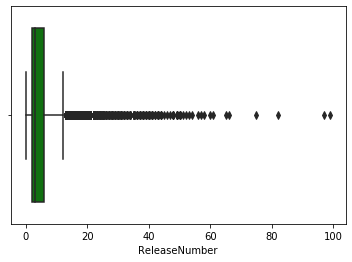

In [29]:
sns.boxplot(x=df_hist["ReleaseNumber"],color="green")
#sns.set_theme(style="whitegrid")

In [30]:
#df_hist.boxplot(column="ReleaseNumber")

**Grafica de Puntos**

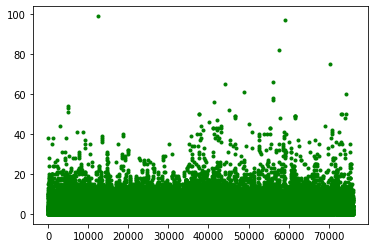

In [31]:
plt.plot(df_hist["ReleaseNumber"],".",color="green")

**Metodo IQR para encontrar Datos Atipicos**

In [32]:
q1,q3=np.percentile(df_hist["ReleaseNumber"],[25,75])
print(q1,q3)

2.0 6.0


In [33]:
IQR=q3-q1
print(IQR)

4.0


**Limites**

In [34]:
limite_Superior=q3+(1.5*IQR)
print(limite_Superior)

12.0


In [35]:
limite_Inferior=q1-(1.5*IQR)
print(limite_Inferior)

-4.0


**Grafica de Puntos con Aticos**

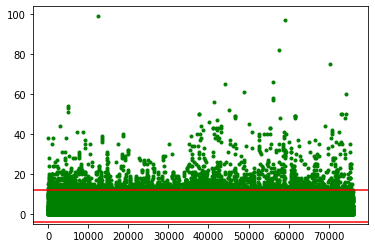

In [36]:
plt.plot(df_hist["ReleaseNumber"],".",color="green")
plt.axhline(y=limite_Superior,color="red",linestyle="-")
plt.axhline(y=limite_Inferior,color="red",linestyle="-")

**Filtramos los datos sin Valores Atipicos**

In [37]:
sin_atipicos=df_hist[(df_hist["ReleaseNumber"]>limite_Inferior) & (df_hist["ReleaseNumber"]<limite_Superior)]

**Graficar Boxplot**

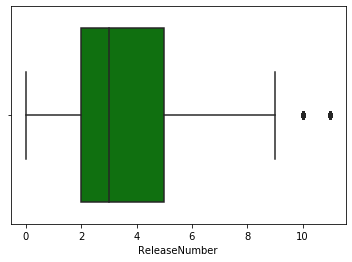

In [38]:
sns.boxplot(x=sin_atipicos["ReleaseNumber"],color="green")
#sns.set_theme(style="whitegrid")

**Histograma**

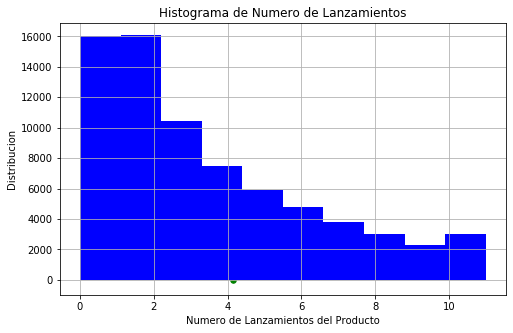

In [39]:
plt.figure(figsize=(8,5))
plt.hist(sin_atipicos["ReleaseNumber"],facecolor="blue")
plt.scatter(Promedio_Inicial,0,color="green",s=30)
plt.xlabel("Numero de Lanzamientos del Producto")
plt.ylabel("Distribucion")
plt.title("Histograma de Numero de Lanzamientos")
plt.grid(True)

**Grafica de Puntos sin Atipicos**

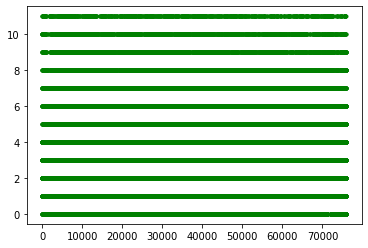

In [40]:
plt.plot(sin_atipicos["ReleaseNumber"],".",color="green")

**Promedio sin Atipicos**

In [41]:
Promedio_Sin_atipicos=sin_atipicos["ReleaseNumber"].mean()
Mediana_Sin_atipicos=sin_atipicos["ReleaseNumber"].median()

print(Promedio_Inicial)
print(Promedio_Sin_atipicos)
print(Mediana_Sin_atipicos)

4.152534343912838
3.6228299088012306
3.0


**Test de Normalidad para variable Numero de lanzamientos**

**Test Visual**

In [42]:
from statsmodels.graphics.gofplots import qqplot

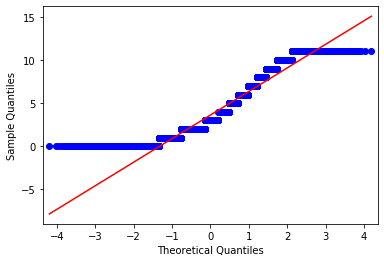

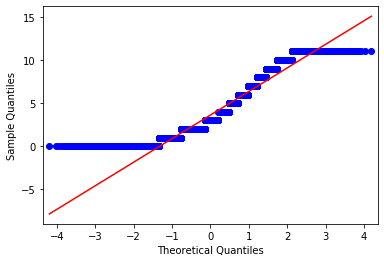

In [43]:
## qqplot
qqplot(sin_atipicos["ReleaseNumber"],line="s")

En estadística, un gráfico de Q-Q (quantile-quantile) es un gráfico de probabilidad, que es un método gráfico para comparar dos distribuciones de probabilidad al trazar sus cuantiles uno contra el otro.En este caso, lo ideal es que los puntos se acerquen a una recta diagonal.

**Prueba Estadistica de Normalidad**

In [44]:
from scipy.stats import shapiro

* H0= La distribuccion del numero de lanzamientos del producto es normal

* Ha= La distribuccion del numero de lanzamientos del producto no es normal

* Alfa = 0.05

* Si P valor < alfa(0.05), se rechaza normalidad, si p > alfa, se Acepta Normalidad

In [45]:
stat,p=shapiro(sin_atipicos["ReleaseNumber"])
print(p)

0.0


D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
if(p <= 0.05):
    print("Se rechaza normalidad,")
else:
    print("Se Acepta Normalidad")

Se rechaza normalidad,


**Pruba de Hipotesis de Promedio o Media**

* H0= El promedio de numero de lanzamientos = 3.6

* Ha= El promedio de numero de lanzamientos  difernte de 3.6

* Alfa = 0.05

* Si P valor < alfa(0.05), se rechaza H0, si p > alfa, se Acepta Ha

In [47]:
from scipy.stats import ttest_1samp
print(Promedio_Sin_atipicos)

3.6228299088012306


In [48]:
tset,pvalor=ttest_1samp(df_hist["ReleaseNumber"],Promedio_Sin_atipicos)

In [49]:
pvalor

2.0656886202275976e-296

In [50]:
if(pvalor <= 0.05):
    print("Se rechaza que el promedio real es 3.6,")
else:
    print("Se Acepta que el promedio real es 3.6")

Se rechaza que el promedio real es 3.6,


**Aproxmacion al Promedio**

**REMUESTREO POR BOOTSTRAP**

In [51]:
from random import sample
import math

In [52]:
print(Promedio_Inicial)
print(Promedio_Sin_atipicos)
print(Mediana_Sin_atipicos)
df_hist.shape

4.152534343912838
3.6228299088012306
3.0


(75996, 14)

**Selecionamos la Muestra Aleatoria**

In [53]:
Muestra=df_hist.sample(n=1000,replace=False)
Muestra.shape

(1000, 14)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


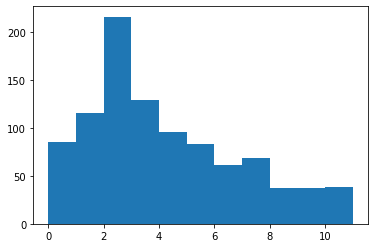

In [54]:
bins=np.arange(0,12,1)
print(bins)
n,bins,grafico_histograma=plt.hist(Muestra["ReleaseNumber"],bins)

In [55]:
Promedio_Muestra=Muestra["ReleaseNumber"].mean()
print(Promedio_Inicial)
print(Promedio_Sin_atipicos)
print(Promedio_Muestra)

4.152534343912838
3.6228299088012306
4.073


**Remuestreo**

In [56]:
Muestra_Medias=[] ## Lista vacia
for i in range(5000):
    muestra_n=Muestra.sample(n=500,replace=True)
    Muestra_Medias.append(muestra_n["ReleaseNumber"].mean())

**Medias de Medias Remuestradas**

In [57]:
Promedio_Remuestrado=np.mean( Muestra_Medias)
print(Promedio_Remuestrado)

4.0740555999999994


(array([  20.,  152.,  647., 1381., 1473.,  931.,  318.,   68.,    8.,
           2.]),
 array([3.564 , 3.6848, 3.8056, 3.9264, 4.0472, 4.168 , 4.2888, 4.4096,
        4.5304, 4.6512, 4.772 ]),
 <a list of 10 Patch objects>)

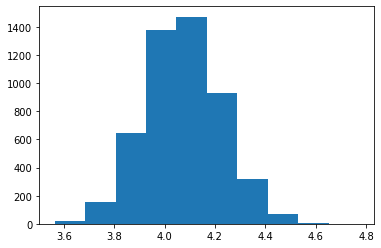

In [58]:
plt.hist(Muestra_Medias)

In [59]:
print(Promedio_Inicial)
print(Promedio_Sin_atipicos)
print(Promedio_Muestra)
print(Promedio_Remuestrado)

4.152534343912838
3.6228299088012306
4.073
4.0740555999999994


**Promedio Aproximado de el numero de lanzamientos de los productos es de 3.8626**

<a id="ref4"></a>
## 4) **Modelación Machine Learning-Clasificación**
* <p><a href ="#ref7"> <font color=red size=3> Inicio </font> </a></p>


**Revisar el Balaceo de la data**

In [60]:
df_hist.head(2)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54


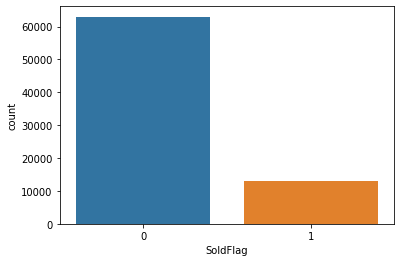

In [61]:
sns.countplot("SoldFlag",data=df_hist)

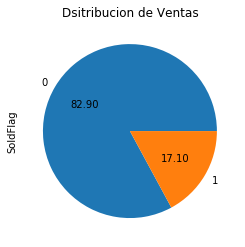

In [62]:
plot = df_hist["SoldFlag"].value_counts().plot(kind="pie",autopct="%.2f",title="Dsitribucion de Ventas")

In [63]:
pd.value_counts(df_hist["SoldFlag"])

0    63000
1    12996
Name: SoldFlag, dtype: int64

In [64]:
df_hist.shape

(75996, 14)

# **Modelo con data Original(con desbalanceo)**

In [65]:
import sklearn
from sklearn.model_selection import train_test_split # dividir en entrenamiento y Testeo

In [66]:
#pip install sklearn

## **1) Modelo Vecino mas cercano KKNN sin variables Categoricas**

**Seleccionar mis Varibles X**

In [67]:
df_hist.columns

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

In [68]:
df_hist.head(2)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54


In [69]:
X=df_hist[['ReleaseNumber','New_Release_Flag','StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']] # Variables Numericas
X.head(2)

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,15,1,682743.0,44.99,2015,8,28.97,31.84
1,7,1,1016014.0,24.81,2005,39,0.00,15.54


**Seleccionamos nuestra Variable Objetivo**

In [70]:
Y=df_hist["SoldFlag"].values
Y

[0, 0, 0, 1, 1, ..., 0, 0, 0, 0, 0]
Length: 75996
Categories (2, int64): [0, 1]

**Estandarizar Los Datos**

In [71]:
from sklearn.preprocessing import MinMaxScaler
S=MinMaxScaler()
X_S=S.fit_transform(X)
X_S

array([[1.51515152e-01, 1.00000000e+00, 4.09533168e-02, ...,
        5.25279054e-03, 2.04876731e-03, 1.66363704e-03],
       [7.07070707e-02, 1.00000000e+00, 6.09460701e-02, ...,
        2.56073539e-02, 0.00000000e+00, 8.11963557e-04],
       [0.00000000e+00, 0.00000000e+00, 2.04201783e-02, ...,
        2.23243598e-02, 2.13504608e-03, 1.46142990e-03],
       ...,
       [7.07070707e-02, 1.00000000e+00, 7.89088394e-02, ...,
        1.24753775e-02, 3.39386756e-03, 2.82097249e-03],
       [2.02020202e-02, 1.00000000e+00, 5.26539645e-02, ...,
        1.37885752e-02, 1.91439873e-03, 1.70439197e-03],
       [2.02020202e-02, 1.00000000e+00, 3.00480096e-02, ...,
        1.51017728e-02, 0.00000000e+00, 1.97974898e-03]])

**Dividir en Entranamiento y Prueba**

In [72]:
x_train,x_test,y_train,y_test= train_test_split(X_S,Y,test_size=0.2,random_state=4)

**Entrenar Modelo**

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
k=3
modelo_Vecino_mas_cercano=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
modelo_Vecino_mas_cercano

KNeighborsClassifier(n_neighbors=3)

**Prediccion**

In [75]:
Predicciones_Vecino_mas_cercano=modelo_Vecino_mas_cercano.predict(x_test)
Predicciones_Vecino_mas_cercano

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Evaluacion del Modelo**

In [76]:
from sklearn import metrics

In [77]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Predicciones_Vecino_mas_cercano))

Accuracy prueba 0.8019078947368421


**Matrix de Confusion**

In [78]:
print(metrics.confusion_matrix(y_test,Predicciones_Vecino_mas_cercano))

[[11671   955]
 [ 2056   518]]


In [79]:
print(metrics.classification_report(y_test,Predicciones_Vecino_mas_cercano))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89     12626
           1       0.35      0.20      0.26      2574

    accuracy                           0.80     15200
   macro avg       0.60      0.56      0.57     15200
weighted avg       0.77      0.80      0.78     15200



**Optimizar el Modelo**

In [80]:
ks=30
accuracy=np.zeros((ks-1))
matrix_confusion=[];
for n in range(1,ks):
    modelo_vmc=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    y_predic=modelo_vmc.predict(x_test)
    accuracy[n-1]=metrics.accuracy_score(y_test,y_predic)

In [81]:
 accuracy

array([0.75927632, 0.82184211, 0.80190789, 0.82519737, 0.81486842,
       0.82828947, 0.82276316, 0.83032895, 0.82703947, 0.83223684,
       0.83144737, 0.83263158, 0.83125   , 0.83296053, 0.83171053,
       0.83328947, 0.83282895, 0.83302632, 0.83315789, 0.83388158,
       0.83328947, 0.83322368, 0.83375   , 0.83375   , 0.83348684,
       0.83375   , 0.83335526, 0.83361842, 0.83401316])

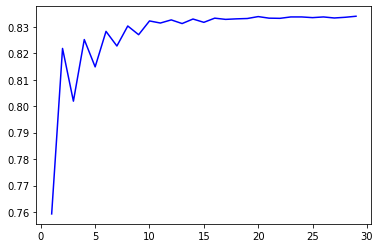

In [82]:
plt.plot(range(1,ks), accuracy,"b")

**Modelo Optimo**

In [83]:
k=20
modelo_Vecino_mas_cercano=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
modelo_Vecino_mas_cercano

KNeighborsClassifier(n_neighbors=20)

In [84]:
Predicciones_Vecino_mas_cercano=modelo_Vecino_mas_cercano.predict(x_test)
Predicciones_Vecino_mas_cercano

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Predicciones_Vecino_mas_cercano))

Accuracy prueba 0.8338815789473685


In [86]:
print(metrics.classification_report(y_test,Predicciones_Vecino_mas_cercano))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91     12626
           1       0.55      0.10      0.17      2574

    accuracy                           0.83     15200
   macro avg       0.70      0.54      0.54     15200
weighted avg       0.79      0.83      0.78     15200



**Balancear los Datos**

**Balanceo con Datos Artificiales**
Oversampling: Es el proceso de generar datos sintéticos que intenta generar aleatoriamente una muestra de los atributos a partir de observaciones en la clase minoritaria

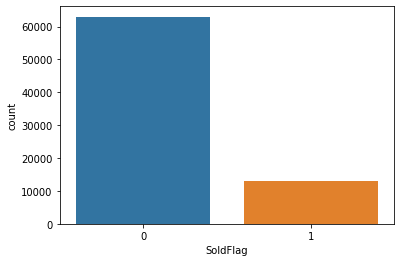

In [87]:
sns.countplot("SoldFlag",data=df_hist)

In [88]:
Ventas=df_hist[df_hist["SoldFlag"]==1]
No_Ventas=df_hist[df_hist["SoldFlag"]==0]

In [89]:
df_clase_ficticia=Ventas.sample(n=len(No_Ventas),replace=True)

In [90]:
df_metodo_1 = pd.concat([df_clase_ficticia,No_Ventas],axis=0)

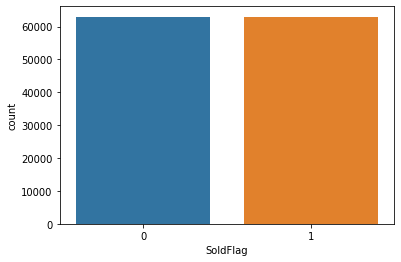

In [91]:
sns.countplot("SoldFlag",data=df_metodo_1 )

**Modelo con Datos Balanceados**

**Seleccion de Variables**

In [92]:
X=df_metodo_1[['ReleaseNumber','New_Release_Flag','StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']] # Variables Numericas
X.head(2)

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
35434,4,1,38589.0,20.95,2011,17,42.94,17.50
43774,0,0,88243.0,47.95,2006,177,31.43,16.88


In [93]:
Y=df_metodo_1["SoldFlag"].values
Y

[1, 1, 1, 1, 1, ..., 0, 0, 0, 0, 0]
Length: 126000
Categories (2, int64): [0, 1]

**Estandarizar**

In [94]:
X_S=S.fit_transform(X)
X_S

array([[4.04040404e-02, 1.00000000e+00, 2.31085468e-03, ...,
        1.11621799e-02, 3.03673001e-03, 9.14373375e-04],
       [0.00000000e+00, 0.00000000e+00, 5.28957221e-03, ...,
        1.16217991e-01, 2.22273927e-03, 8.81978432e-04],
       [1.01010101e-02, 0.00000000e+00, 2.51016972e-02, ...,
        4.46487196e-02, 8.55857162e-03, 2.29847341e-03],
       ...,
       [7.07070707e-02, 1.00000000e+00, 7.89088394e-02, ...,
        1.24753775e-02, 3.39386756e-03, 2.82097249e-03],
       [2.02020202e-02, 1.00000000e+00, 5.26539645e-02, ...,
        1.37885752e-02, 1.91439873e-03, 1.70439197e-03],
       [2.02020202e-02, 1.00000000e+00, 3.00480096e-02, ...,
        1.51017728e-02, 0.00000000e+00, 1.97974898e-03]])

**Dividir Base para entrenar y probar**

In [95]:
x_train,x_test,y_train,y_test= train_test_split(X_S,Y,test_size=0.2,random_state=4)

**Modelo**

In [96]:
k=20
modelo_Vecino_mas_cercano=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
modelo_Vecino_mas_cercano

KNeighborsClassifier(n_neighbors=20)

In [97]:
Predicciones_Vecino_mas_cercano=modelo_Vecino_mas_cercano.predict(x_test)
Predicciones_Vecino_mas_cercano

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [98]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Predicciones_Vecino_mas_cercano))

Accuracy prueba 0.6844444444444444


In [99]:
print(metrics.classification_report(y_test,Predicciones_Vecino_mas_cercano))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68     12462
           1       0.69      0.69      0.69     12738

    accuracy                           0.68     25200
   macro avg       0.68      0.68      0.68     25200
weighted avg       0.68      0.68      0.68     25200



**Balanceo de Datos- Eliminando Datos de la clase Mayoritaria**

In [100]:
Eliminacion_No_Ventas=No_Ventas.sample(n=len(Ventas),random_state=4)

In [101]:
df_metodo_2=pd.concat([Ventas,Eliminacion_No_Ventas],axis=0)

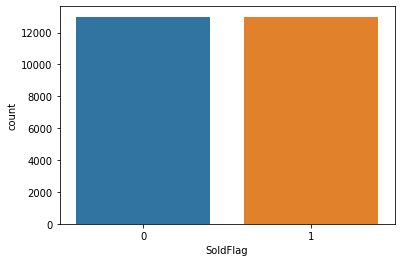

In [102]:
sns.countplot("SoldFlag",data=df_metodo_2)

**Correr Modelo con metodo2**

In [103]:
X=df_metodo_2[['ReleaseNumber','New_Release_Flag','StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']] # Variables Numericas
X.head(2)

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
3,4,1,334011.0,100.00,2006,20,133.93,83.15
4,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [104]:
Y=df_metodo_2["SoldFlag"].values
Y

[1, 1, 1, 1, 1, ..., 0, 0, 0, 0, 0]
Length: 25992
Categories (2, int64): [0, 1]

In [105]:
X_S=S.fit_transform(X)
X_S

array([[4.12371134e-02, 1.00000000e+00, 2.09185235e-02, ...,
        1.31319764e-02, 1.72124184e-02, 8.31170025e-03],
       [2.06185567e-02, 1.00000000e+00, 8.06815182e-02, ...,
        1.83847669e-02, 5.14072081e-04, 2.39804797e-03],
       [6.18556701e-02, 1.00000000e+00, 2.39957388e-02, ...,
        4.53053185e-02, 2.19058965e-02, 7.89586534e-03],
       ...,
       [2.06185567e-02, 1.00000000e+00, 5.68568750e-03, ...,
        3.67695338e-02, 7.54272260e-03, 7.59598439e-03],
       [1.03092784e-02, 0.00000000e+00, 1.53381873e-01, ...,
        1.37885752e-02, 6.45031943e-03, 5.25991182e-03],
       [3.09278351e-02, 1.00000000e+00, 6.66155907e-02, ...,
        2.36375575e-02, 1.40598714e-03, 2.79788924e-03]])

In [106]:
x_train,x_test,y_train,y_test= train_test_split(X_S,Y,test_size=0.2,random_state=4)

In [107]:
k=20
modelo_Vecino_mas_cercano=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
modelo_Vecino_mas_cercano

KNeighborsClassifier(n_neighbors=20)

In [108]:
Predicciones_Vecino_mas_cercano=modelo_Vecino_mas_cercano.predict(x_test)
Predicciones_Vecino_mas_cercano

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [109]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Predicciones_Vecino_mas_cercano))

Accuracy prueba 0.6545489517214849


In [110]:
print(metrics.classification_report(y_test,Predicciones_Vecino_mas_cercano))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      2580
           1       0.68      0.60      0.64      2619

    accuracy                           0.65      5199
   macro avg       0.66      0.65      0.65      5199
weighted avg       0.66      0.65      0.65      5199



**Incluir Variable Dummy - Tipo de Mercadeo**

In [111]:
X=df_metodo_1[['ReleaseNumber','New_Release_Flag','StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice',"MarketingType"]] # Variables Numericas y categorica
X.head(2)

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,MarketingType
35434,4,1,38589.0,20.95,2011,17,42.94,17.50,S
43774,0,0,88243.0,47.95,2006,177,31.43,16.88,S


In [112]:
Mercadeo_dummy=pd.get_dummies(X["MarketingType"])
Mercadeo_dummy

,D,S
35434,0,1
43774,0,1
19569,1,0
17448,1,0
17028,1,0
...,...,...
75991,0,1
75992,0,1
75993,0,1
75994,0,1


In [113]:
X_completo=pd.concat([X,Mercadeo_dummy],axis=1)

In [114]:
X_completo.head()

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,MarketingType,D,S
35434,4,1,38589.0,20.95,2011,17,42.94,17.50,S,0,1
43774,0,0,88243.0,47.95,2006,177,31.43,16.88,S,0,1
19569,1,0,418503.0,131.95,2011,68,121.02,43.99,D,1,0
17448,4,1,1083710.0,145.00,2009,33,44.25,43.99,D,1,0
17028,4,1,415628.0,39.33,2010,44,33.93,48.71,D,1,0


In [115]:
X=X_completo.drop(["MarketingType"],axis=1)

In [116]:
X.head(4)

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,D,S
35434,4,1,38589.0,20.95,2011,17,42.94,17.50,0,1
43774,0,0,88243.0,47.95,2006,177,31.43,16.88,0,1
19569,1,0,418503.0,131.95,2011,68,121.02,43.99,1,0
17448,4,1,1083710.0,145.00,2009,33,44.25,43.99,1,0


**Estandarizar**

In [117]:
X_S=S.fit_transform(X)
X_S

array([[4.04040404e-02, 1.00000000e+00, 2.31085468e-03, ...,
        9.14373375e-04, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.28957221e-03, ...,
        8.81978432e-04, 0.00000000e+00, 1.00000000e+00],
       [1.01010101e-02, 0.00000000e+00, 2.51016972e-02, ...,
        2.29847341e-03, 1.00000000e+00, 0.00000000e+00],
       ...,
       [7.07070707e-02, 1.00000000e+00, 7.89088394e-02, ...,
        2.82097249e-03, 0.00000000e+00, 1.00000000e+00],
       [2.02020202e-02, 1.00000000e+00, 5.26539645e-02, ...,
        1.70439197e-03, 0.00000000e+00, 1.00000000e+00],
       [2.02020202e-02, 1.00000000e+00, 3.00480096e-02, ...,
        1.97974898e-03, 0.00000000e+00, 1.00000000e+00]])

In [118]:
Y=df_metodo_1["SoldFlag"].values
Y
x_train,x_test,y_train,y_test= train_test_split(X_S,Y,test_size=0.2,random_state=4)

In [119]:
k=20
modelo_Vecino_mas_cercano=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
modelo_Vecino_mas_cercano

KNeighborsClassifier(n_neighbors=20)

In [120]:
Predicciones_Vecino_mas_cercano=modelo_Vecino_mas_cercano.predict(x_test)
Predicciones_Vecino_mas_cercano

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [121]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Predicciones_Vecino_mas_cercano))
Reporte_Modelo_KKNN=metrics.classification_report(y_test,Predicciones_Vecino_mas_cercano)
print(metrics.classification_report(y_test,Predicciones_Vecino_mas_cercano))

Accuracy prueba 0.7146825396825397
              precision    recall  f1-score   support

           0       0.72      0.70      0.71     12462
           1       0.71      0.73      0.72     12738

    accuracy                           0.71     25200
   macro avg       0.71      0.71      0.71     25200
weighted avg       0.71      0.71      0.71     25200



## Modelo2 **Arbol de Decisión**

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [123]:
Modelo_Arbol = DecisionTreeClassifier(criterion="entropy",max_depth=4)

**Entrenamos el Modelo**

In [124]:
Modelo_Arbol.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(167.4, 195.696, 'X[8] <= 0.5\nentropy = 1.0\nsamples = 100800\nvalue = [50538, 50262]'),
 Text(83.7, 152.208, 'X[5] <= 0.029\nentropy = 0.919\nsamples = 44625\nvalue = [29727, 14898]'),
 Text(41.85, 108.72, 'X[2] <= 0.058\nentropy = 0.842\nsamples = 29330\nvalue = [21403, 7927]'),
 Text(20.925, 65.232, 'X[3] <= 0.02\nentropy = 0.896\nsamples = 18170\nvalue = [12495, 5675]'),
 Text(10.4625, 21.744, 'entropy = 0.815\nsamples = 10724\nvalue = [8021, 2703]'),
 Text(31.387500000000003, 21.744, 'entropy = 0.97\nsamples = 7446\nvalue = [4474, 2972]'),
 Text(62.775000000000006, 65.232, 'X[6] <= 0.002\nentropy = 0.725\nsamples = 11160\nvalue = [8908, 2252]'),
 Text(52.3125, 21.744, 'entropy = 0.527\nsamples = 3271\nvalue = [2881, 390]'),
 Text(73.2375, 21.744, 'entropy = 0.788\nsamples = 7889\nvalue = [6027, 1862]'),
 Text(125.55000000000001, 108.72, 'X[2] <= 0.04\nentropy = 0.994\nsamples = 15295\nvalue = [8324, 6971]'),
 Text(104.625, 65.232, 'X[3] <= 0.025\nentropy = 1.0\nsamples = 109

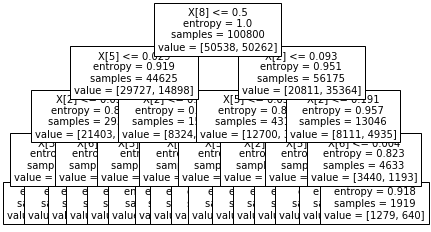

In [125]:
tree.plot_tree(Modelo_Arbol.fit(x_train,y_train),fontsize=10)

In [126]:
X.head(4)

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,D,S
35434,4,1,38589.0,20.95,2011,17,42.94,17.50,0,1
43774,0,0,88243.0,47.95,2006,177,31.43,16.88,0,1
19569,1,0,418503.0,131.95,2011,68,121.02,43.99,1,0
17448,4,1,1083710.0,145.00,2009,33,44.25,43.99,1,0


In [127]:
Variable_Importantes_Arbol_D=X[["D","ItemCount","StrengthFactor","PriceReg"]]

In [128]:
Variable_Importantes_Arbol_D.to_excel(r"D:\Usuarios\OSCAGAAl\Documents\Diplomado_ML_2020\Resultados\Variable_Importantes_Arbol_D.xlsx")

In [129]:
## Ver directoria donde estoy trabajando 
import os
os.getcwd()

'D:\\Usuarios\\OSCAGAAl\\Documents\\Diplomado_ML_2020\\Codigos'

**Prediccion del Arbol**

In [130]:
Prediccion_arbol=Modelo_Arbol.predict(x_test)
Prediccion_arbol

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [131]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Prediccion_arbol))

Accuracy prueba 0.6813888888888889


In [132]:
Reporte_Arbol_D=metrics.classification_report(y_test,Prediccion_arbol)
print(metrics.classification_report(y_test,Prediccion_arbol))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67     12462
           1       0.68      0.69      0.69     12738

    accuracy                           0.68     25200
   macro avg       0.68      0.68      0.68     25200
weighted avg       0.68      0.68      0.68     25200



## **3 Modelo Random Forest**

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
Modelo_RF= RandomForestClassifier(criterion="entropy",random_state=0,oob_score=True)

In [135]:
Modelo_RF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=0)

**Prediccion**

In [136]:
Prediccion_RF=Modelo_RF.predict(x_test)
Prediccion_RF

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [137]:

print("Accuracy prueba",metrics.accuracy_score(y_test,Prediccion_RF))

Accuracy prueba 0.9522222222222222


In [138]:
Reporte_RF=metrics.classification_report(y_test,Prediccion_RF)
print(metrics.classification_report(y_test,Prediccion_RF))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     12462
           1       0.93      0.98      0.95     12738

    accuracy                           0.95     25200
   macro avg       0.95      0.95      0.95     25200
weighted avg       0.95      0.95      0.95     25200



**Correr Modelo RF con Datos Originales**

In [139]:
X=df_hist[['ReleaseNumber','New_Release_Flag','StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice',"MarketingType"]] # Variables Numericas y categorica
X.head(2)
Mercadeo_dummy=pd.get_dummies(X["MarketingType"])
X_completo=pd.concat([X,Mercadeo_dummy],axis=1)
X=X_completo.drop(["MarketingType"],axis=1)
## Estandarizar
X_S=S.fit_transform(X)
Y=df_hist["SoldFlag"].values
x_train,x_test,y_train,y_test= train_test_split(X_S,Y,test_size=0.2,random_state=4)

In [140]:
Modelo_RF_Datos_O= RandomForestClassifier(criterion="entropy",random_state=0,oob_score=True)

In [141]:
Modelo_RF_Datos_O.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=0)

In [142]:
Prediccion_RF_DO=Modelo_RF_Datos_O.predict(x_test)
Prediccion_RF_DO

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Prediccion_RF_DO))

Accuracy prueba 0.8358552631578947


In [144]:
Reporte_RF_DO=metrics.classification_report(y_test,Prediccion_RF_DO)
print(metrics.classification_report(y_test,Prediccion_RF_DO))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     12626
           1       0.56      0.15      0.24      2574

    accuracy                           0.84     15200
   macro avg       0.70      0.56      0.57     15200
weighted avg       0.80      0.84      0.80     15200



## **4) Modelo de Maquina de Soporte Vectorial**

**Modelo 4A   MSV con Kernel Lineal**

In [145]:
from sklearn import svm

In [146]:
Modelo_MSV_Lineal=svm.SVC(kernel="linear")

In [147]:
# Entrenar
Modelo_MSV_Lineal=Modelo_MSV_Lineal.fit(x_train,y_train)

In [148]:
Prediccion_MSV_L=Modelo_MSV_Lineal.predict(x_test)
Prediccion_MSV_L

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Prediccion_MSV_L))

Accuracy prueba 0.8306578947368422


In [150]:
Reporte_MSV_L=metrics.classification_report(y_test,Prediccion_MSV_L)
print(metrics.classification_report(y_test,Prediccion_MSV_L))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     12626
           1       0.00      0.00      0.00      2574

    accuracy                           0.83     15200
   macro avg       0.42      0.50      0.45     15200
weighted avg       0.69      0.83      0.75     15200



D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Modelo 4B MSV con Kernel Polinomio**

In [151]:
Modelo_MSV_P=svm.SVC(kernel="poly",degree=4)
Modelo_MSV_P=Modelo_MSV_P.fit(x_train,y_train)
# prediccion
Prediccion_MSV_P=Modelo_MSV_P.predict(x_test)
Prediccion_MSV_P

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [152]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Prediccion_MSV_P))

Accuracy prueba 0.8307894736842105


In [153]:
Reporte_MSV_P=metrics.classification_report(y_test,Prediccion_MSV_P)
print(metrics.classification_report(y_test,Prediccion_MSV_P))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     12626
           1       0.75      0.00      0.00      2574

    accuracy                           0.83     15200
   macro avg       0.79      0.50      0.45     15200
weighted avg       0.82      0.83      0.75     15200



In [154]:
print(metrics.confusion_matrix(y_test,Prediccion_MSV_P))

[[12625     1]
 [ 2571     3]]


**Modelo 4B MSV con Kernel Radial**

In [155]:
Modelo_MSV_R=svm.SVC(kernel="rbf")
Modelo_MSV_R=Modelo_MSV_R.fit(x_train,y_train)
# prediccion
Prediccion_MSV_R=Modelo_MSV_R.predict(x_test)
Prediccion_MSV_R

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [156]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Prediccion_MSV_R))

Accuracy prueba 0.8306578947368422


In [167]:
Reporte_MSV_R=metrics.classification_report(y_test,Prediccion_MSV_R)
print(metrics.classification_report(y_test,Prediccion_MSV_R))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     12626
           1       0.00      0.00      0.00      2574

    accuracy                           0.83     15200
   macro avg       0.42      0.50      0.45     15200
weighted avg       0.69      0.83      0.75     15200



D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Clasificador Bayesiano**

In [169]:
from sklearn.naive_bayes import GaussianNB
# Crear Modelo
Modelo_CB=GaussianNB()
# Entrenar Modelo
Modelo_CB.fit(x_train,y_train)

GaussianNB()

**Prediccion**

In [170]:
# prediccion
Prediccion_CB=Modelo_MSV_R.predict(x_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [171]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Prediccion_CB))

Accuracy prueba 0.8306578947368422


In [184]:
Reporte_CB=metrics.classification_report(y_test,Prediccion_CB)
print(metrics.classification_report(y_test,Prediccion_CB))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     12626
           1       0.00      0.00      0.00      2574

    accuracy                           0.83     15200
   macro avg       0.42      0.50      0.45     15200
weighted avg       0.69      0.83      0.75     15200



D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Modelo Logit**

In [174]:
from sklearn.linear_model import LogisticRegression

In [181]:
Modelo_RL=LogisticRegression()
# entrenamos 
Modelo_RL.fit(x_train,y_train)
# Prediccion 
Prediccion_RL=Modelo_RL.predict(x_test)
Prediccion_RL_P=Modelo_RL.predict_proba(x_test)
print(Prediccion_RL_P)
print(Prediccion_RL)

[[0.97995056 0.02004944]
 [0.94868294 0.05131706]
 [0.89527297 0.10472703]
 ...
 [0.9357992  0.0642008 ]
 [0.96290588 0.03709412]
 [0.93246717 0.06753283]]
[0 0 0 ... 0 0 0]


D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [182]:
print("Accuracy prueba",metrics.accuracy_score(y_test,Prediccion_RL))

Accuracy prueba 0.834078947368421


In [185]:
Reporte_RL=metrics.classification_report(y_test,Prediccion_RL)
print(metrics.classification_report(y_test,Prediccion_RL))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     12626
           1       0.59      0.06      0.11      2574

    accuracy                           0.83     15200
   macro avg       0.72      0.53      0.51     15200
weighted avg       0.80      0.83      0.77     15200



<a id="ref5"></a>
## 1) **Evalucion**
* <p><a href ="#ref7"> <font color=red size=3> Inicio </font> </a></p>


**Seleccionar el Mejor Modelo**

In [188]:
print("Modelo KKNN",Reporte_Modelo_KKNN)
print("AD",Reporte_Arbol_D)
print("RF",Reporte_RF)### Metodo Emsable + Mas robustos 
print("RF_DO",Reporte_RF_DO)
print("MSV_L",Reporte_MSV_L)
print("MSV_P",Reporte_MSV_P)### Mejor Modelo en el diagnostico, fallo al pasar al mundo real.
print("MSV_R",Reporte_MSV_R)
print("MSV_Bayes",Reporte_CB)
print("MSV_Logistica",Reporte_RL)## 

Modelo KKNN               precision    recall  f1-score   support

           0       0.72      0.70      0.71     12462
           1       0.71      0.73      0.72     12738

    accuracy                           0.71     25200
   macro avg       0.71      0.71      0.71     25200
weighted avg       0.71      0.71      0.71     25200

AD               precision    recall  f1-score   support

           0       0.68      0.67      0.67     12462
           1       0.68      0.69      0.69     12738

    accuracy                           0.68     25200
   macro avg       0.68      0.68      0.68     25200
weighted avg       0.68      0.68      0.68     25200

RF               precision    recall  f1-score   support

           0       0.98      0.92      0.95     12462
           1       0.93      0.98      0.95     12738

    accuracy                           0.95     25200
   macro avg       0.95      0.95      0.95     25200
weighted avg       0.95      0.95      0.95     25200

R

**Prediccion del Inventario Activo**

In [189]:
df_act.head(5)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
75996,85107,Active,869734,NaN,NaN,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08
75997,85108,Active,3741319,NaN,NaN,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00
75998,85109,Active,3517789,NaN,NaN,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00
75999,85110,Active,1455936,NaN,NaN,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81
76000,85111,Active,2921480,NaN,NaN,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80


In [194]:
X_nueva=df_act[['ReleaseNumber','New_Release_Flag','StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice',"MarketingType"]] # Variables Numericas y categorica

In [195]:
Mercadeo_dummy=pd.get_dummies(X_nueva["MarketingType"])
X_completo=pd.concat([X_nueva,Mercadeo_dummy],axis=1)
X_nueva=X_completo.drop(["MarketingType"],axis=1)
X_nueva

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,D,S
75996,9,1,1.251478e+06,92.82,2018,49,11.46,69.08,0,1
75997,4,1,2.407071e+06,49.00,2016,0,0.00,49.00,0,1
75998,3,1,6.890734e+06,44.95,2016,0,0.00,0.00,0,1
75999,8,1,9.156233e+04,219.00,2014,44,13.71,59.81,0,1
76000,5,1,6.922798e+06,83.95,2016,0,0.00,79.80,0,1
...,...,...,...,...,...,...,...,...,...,...
198912,7,1,2.101869e+05,72.87,2006,54,8.46,60.59,1,0
198913,8,1,4.555041e+05,247.00,2009,65,8.40,74.85,1,0
198914,2,1,1.692746e+05,50.00,2012,23,23.98,32.62,0,1
198915,2,1,3.775266e+05,46.95,2001,23,27.42,37.89,0,1


In [200]:
## Estandarizar X nuevas
X_S=S.fit_transform(X_nueva)

**Aplicamos el Modelo**

In [201]:
Predicciones_Inventario_Activo = Modelo_MSV_P.predict(X_S)

In [203]:
df_act["Prediccion_Venta_6_Meses"]=Predicciones_Inventario_Activo

D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [204]:
df_act.head(5)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,Prediccion_Venta_6_Meses
75996,85107,Active,869734,NaN,NaN,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08,0
75997,85108,Active,3741319,NaN,NaN,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00,0
75998,85109,Active,3517789,NaN,NaN,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00,0
75999,85110,Active,1455936,NaN,NaN,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81,0
76000,85111,Active,2921480,NaN,NaN,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80,0


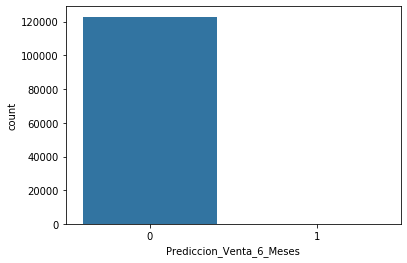

In [205]:
sns.countplot("Prediccion_Venta_6_Meses",data=df_act)

**Random Forest**

In [206]:
Predicciones_Inventario_Activo_RF = Modelo_RF_Datos_O.predict(X_S)

In [207]:
df_act["Prediccion_Venta_6_Meses_RF"]=Predicciones_Inventario_Activo_RF

D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
df_act.head(5)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,Prediccion_Venta_6_Meses,Prediccion_Venta_6_Meses_RF
75996,85107,Active,869734,NaN,NaN,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08,0,0
75997,85108,Active,3741319,NaN,NaN,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00,0,0
75998,85109,Active,3517789,NaN,NaN,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00,0,0
75999,85110,Active,1455936,NaN,NaN,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81,0,0
76000,85111,Active,2921480,NaN,NaN,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80,0,0


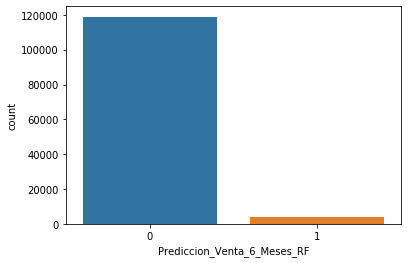

In [209]:
sns.countplot("Prediccion_Venta_6_Meses_RF",data=df_act)

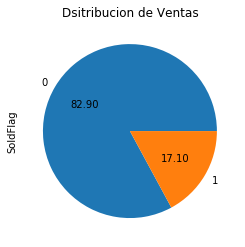

In [210]:
plot = df_hist["SoldFlag"].value_counts().plot(kind="pie",autopct="%.2f",title="Dsitribucion de Ventas")

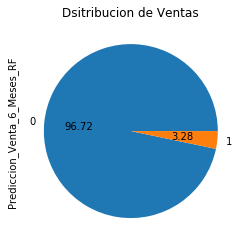

In [212]:
plot = df_act["Prediccion_Venta_6_Meses_RF"].value_counts().plot(kind="pie",autopct="%.2f",title="Dsitribucion de Ventas")

**Exportar_Resultados**

In [213]:
df_act.to_excel(r"D:\Usuarios\OSCAGAAl\Documents\Diplomado_ML_2020\Resultados\Predicciones_Inventarios_23-11-2020.xlsx")